In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

- Không có năm nào mà có nhiều hơn 1 quốc gia đồng tổ chức olympic
- 

In [2]:
data = pd.read_csv('./olympic_athletes_data.csv')

In [3]:
data.head()

,Athlete Name,Host City,Host Country,Year,Athlete Team Country,Sport,Event,Medal
0,Foluke Akinradewo,Rio de Janeiro,Brazil,2016,USA,Women's Volleyball,Indoor,Bronze
1,Lucy Davis,Rio de Janeiro,Brazil,2016,USA,Equestrian,Team Show Jumping,Silver
2,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,200 Backstroke,Gold
3,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,800 Freestyle Relay,Gold
4,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,400 Individual Medley,Silver


In [4]:
data.drop(np.where(data['Athlete Team Country'] != 'USA')[0], inplace=True)

In [5]:
data.head()

,Athlete Name,Host City,Host Country,Year,Athlete Team Country,Sport,Event,Medal
0,Foluke Akinradewo,Rio de Janeiro,Brazil,2016,USA,Women's Volleyball,Indoor,Bronze
1,Lucy Davis,Rio de Janeiro,Brazil,2016,USA,Equestrian,Team Show Jumping,Silver
2,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,200 Backstroke,Gold
3,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,800 Freestyle Relay,Gold
4,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,400 Individual Medley,Silver


In [6]:
data.describe()

,Year
count,264.000000
mean,1978.484848
std,32.453180
min,1912.000000
25%,1959.000000
50%,1992.000000
75%,2008.000000
max,2016.000000


In [7]:
data.loc[data['Medal'] == 'Bronze (tie)', 'Medal'] = 'Bronze'

In [8]:
data.groupby('Medal').count()

,Athlete Name,Host City,Host Country,Year,Athlete Team Country,Sport,Event
Medal,,,,,,,
Bronze,56,56,56,56,56,56,56
Gold,137,137,137,137,137,137,137
Silver,71,71,71,71,71,71,71


In [9]:
medal = pd.get_dummies(data['Medal'])
medal

,Bronze,Gold,Silver
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
265,0,1,0
266,0,1,0
267,0,1,0
268,0,1,0


In [10]:
data = pd.concat([data, medal], axis=1)

In [11]:
data.head()

,Athlete Name,Host City,Host Country,Year,Athlete Team Country,Sport,Event,Medal,Bronze,Gold,Silver
0,Foluke Akinradewo,Rio de Janeiro,Brazil,2016,USA,Women's Volleyball,Indoor,Bronze,1,0,0
1,Lucy Davis,Rio de Janeiro,Brazil,2016,USA,Equestrian,Team Show Jumping,Silver,0,0,1
2,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,200 Backstroke,Gold,0,1,0
3,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,800 Freestyle Relay,Gold,0,1,0
4,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,400 Individual Medley,Silver,0,0,1


In [12]:
data.drop(['Medal'], axis = 1, inplace=True)

In [13]:
data.head()

,Athlete Name,Host City,Host Country,Year,Athlete Team Country,Sport,Event,Bronze,Gold,Silver
0,Foluke Akinradewo,Rio de Janeiro,Brazil,2016,USA,Women's Volleyball,Indoor,1,0,0
1,Lucy Davis,Rio de Janeiro,Brazil,2016,USA,Equestrian,Team Show Jumping,0,0,1
2,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,200 Backstroke,0,1,0
3,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,800 Freestyle Relay,0,1,0
4,Maya DiRado,Rio de Janeiro,Brazil,2016,USA,Women's Swimming,400 Individual Medley,0,0,1


In [65]:
sport = data.loc[:, ['Sport', 'Bronze', 'Gold', 'Silver']].groupby('Sport').count()
sport.head()

,Bronze,Gold,Silver
Sport,,,
Baseball,2,2,2
Equestrian,1,1,1
Field Hockey,1,1,1
Men's Basketball,2,2,2
Men's Diving,11,11,11


In [73]:
sport.sort_values(by=['Gold'], inplace=True)

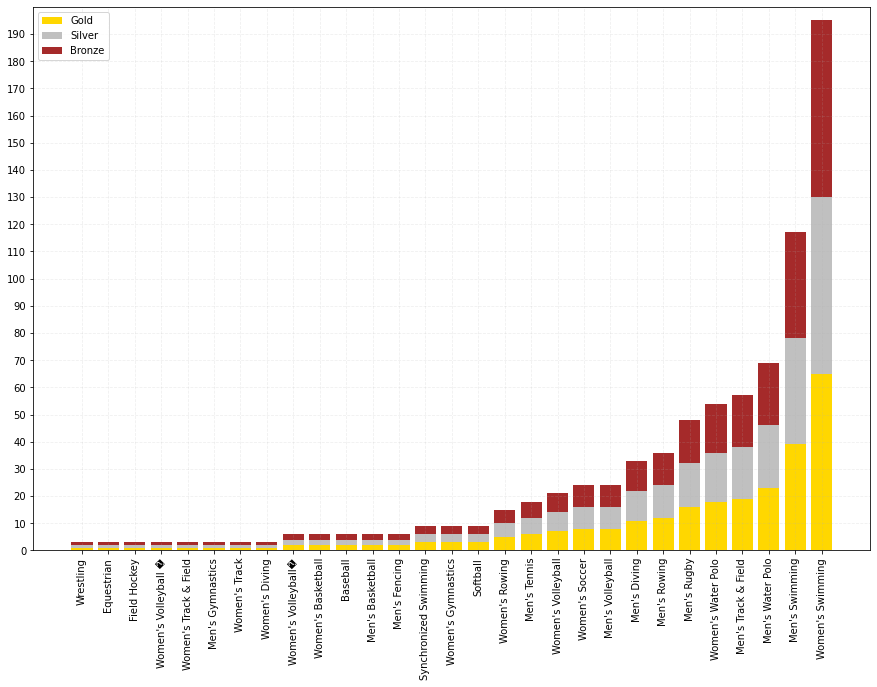

In [74]:
width = 0.8

fg, ax = plt.subplots(figsize=(15,10))

ax.bar(sport.index, sport['Gold'], width=width, color="gold", label="Gold")
ax.bar(sport.index, sport['Silver'], width=width, bottom=sport['Gold'], color="silver", label="Silver")
ax.bar(sport.index, sport['Bronze'], width=width, bottom=sport['Gold'] + sport['Silver'], color="brown", label="Bronze")
ax.set_ylim(0, 200)
ax.grid(alpha=0.2, ls='--')
ax.legend()
plt.yticks(range(0, 200, 10))
plt.xticks(sport.index, rotation=90)
plt.show()